# Homework-1_Problem-1b

### Objective: Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

### Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

### Identify the best parameters for your linear regression model, based on the above input variables. 

### Plot the training and validation losses (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best. 

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # Data Visualisation
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading from table
housing = pd.read_csv("/content/gdrive/MyDrive/Datasets/Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
m = len(housing)
m

545

In [ ]:
housing.shape

(545, 13)

In [ ]:
# List of variables to map (string to numerical values)
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
           
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# split 80% as training set and 20% as testing set
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

df_train.shape

(436, 13)

In [ ]:
df_test.shape

(109, 13)

In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
22,8050,3,1,1,1,1,1,0,1,1,0,8645000
41,6360,3,2,4,1,0,0,0,1,0,1,7840000
91,6750,2,1,1,1,1,1,0,0,2,1,6419000
118,6420,3,1,1,1,0,1,0,1,0,1,5950000
472,3630,4,1,2,1,0,0,0,0,3,0,3010000


In [ ]:
df_Newtrain.shape

(436, 12)

In [ ]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [ ]:
X_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,8050,3,1,1,1,1,1,0,1,1,0
41,6360,3,2,4,1,0,0,0,1,0,1
91,6750,2,1,1,1,1,1,0,0,2,1
118,6420,3,1,1,1,0,1,0,1,0,1
472,3630,4,1,2,1,0,0,0,0,3,0


In [ ]:
y_Newtrain.head()

22     8645000
41     7840000
91     6419000
118    5950000
472    3010000
Name: price, dtype: int64

In [ ]:
y = y_Newtrain.values
print('y = ', y[: 10])

y =  [ 8645000  7840000  6419000  5950000  3010000  3850000 12250000  4480000
  5110000  4319000]


In [ ]:
# preparing the training set

X1 = df_Newtrain.values[:, 0]      # getting input value from first column and putting in Variable-1 (X1)          
X2 = df_Newtrain.values[:, 1]      # getting input value from first column and putting in Variable-2 (X2)          
X3 = df_Newtrain.values[:, 2]      # getting input value from first column and putting in Variable-3 (X3)          
X4 = df_Newtrain.values[:, 3]      # getting input value from first column and putting in Variable-4 (X4)          
X5 = df_Newtrain.values[:, 4]      # getting input value from first column and putting in Variable-5 (X5)         
X6 = df_Newtrain.values[:, 5]      # getting input value from first column and putting in Variable-6 (X6)
X7 = df_Newtrain.values[:, 6]      # getting input value from first column and putting in Variable-7 (X7)
X8 = df_Newtrain.values[:, 7]      # getting input value from first column and putting in Variable-8 (X8)
X9 = df_Newtrain.values[:, 8]      # getting input value from first column and putting in Variable-9 (X9)
X10 = df_Newtrain.values[:, 9]     # getting input value from first column and putting in Variable-10 (X10) 
X11 = df_Newtrain.values[:, 10]    # getting input value from first column and putting in Variable-11 (X11)  

# print first 10 values from each variable
print('X1 = ', X1[: 10]) 
print('X2 = ', X2[: 10])
print('X3 = ', X3[: 10])
print('X4 = ', X4[: 10])
print('X5 = ', X5[: 10])
print('X6 = ', X6[: 10]) 
print('X7 = ', X7[: 10])
print('X8 = ', X8[: 10])
print('X9 = ', X9[: 10])
print('X10 = ', X10[: 10])
print('X11 = ', X11[: 10])

X1 =  [8050 6360 6750 6420 3630 3850 8960 8250 3000 4032]
X2 =  [3 3 2 3 4 2 4 3 3 2]
X3 =  [1 2 1 1 1 1 4 1 2 1]
X4 =  [1 4 1 1 2 1 4 1 2 1]
X5 =  [1 1 1 1 1 1 1 1 1 1]
X6 =  [1 0 1 0 0 0 0 0 1 0]
X7 =  [1 0 1 1 0 0 0 0 1 1]
X8 =  [0 0 0 0 0 0 0 0 0 0]
X9 =  [1 1 0 1 0 0 1 0 0 0]
X10 =  [1 0 2 0 3 0 3 0 0 0]
X11 =  [0 1 1 1 0 0 0 0 0 0]


In [ ]:
m = len(X_Newtrain)         # size of training set
X_0 = np.ones((m, 1))       # Creating a single column matrix (X_0) of training set size, contains all ones 
X_0 [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# Converting 1D arrays of training X's to 2D arrays

X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)
X_6 = X6.reshape(m, 1)
X_7 = X7.reshape(m, 1)
X_8 = X8.reshape(m, 1)
X_9 = X9.reshape(m, 1)
X_10 = X10.reshape(m, 1)
X_11 = X11.reshape(m, 1)

# print first 5 values from each 2D array
print('X_1 = ', X_1[: 5])
print('X_2 = ', X_2[: 5])
print('X_3 = ', X_3[: 5])
print('X_4 = ', X_4[: 5])
print('X_5 = ', X_5[: 5])
print('X_6 = ', X_6[: 5])
print('X_7 = ', X_7[: 5])
print('X_8 = ', X_8[: 5])
print('X_9 = ', X_9[: 5])
print('X_10 = ', X_10[: 5])
print('X_11 = ', X_11[: 5])

X_1 =  [[8050]
 [6360]
 [6750]
 [6420]
 [3630]]
X_2 =  [[3]
 [3]
 [2]
 [3]
 [4]]
X_3 =  [[1]
 [2]
 [1]
 [1]
 [1]]
X_4 =  [[1]
 [4]
 [1]
 [1]
 [2]]
X_5 =  [[1]
 [1]
 [1]
 [1]
 [1]]
X_6 =  [[1]
 [0]
 [1]
 [0]
 [0]]
X_7 =  [[1]
 [0]
 [1]
 [1]
 [0]]
X_8 =  [[0]
 [0]
 [0]
 [0]
 [0]]
X_9 =  [[1]
 [1]
 [0]
 [1]
 [0]]
X_10 =  [[1]
 [0]
 [2]
 [0]
 [3]]
X_11 =  [[0]
 [1]
 [1]
 [1]
 [0]]


In [ ]:
# Stacking from X_0 to X_11 horizotally
# This is the final X Matrix for training

X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11))
X [: 5]

array([[1.00e+00, 8.05e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 6.36e+03, 3.00e+00, 2.00e+00, 4.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 6.75e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 1.00e+00],
       [1.00e+00, 6.42e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 3.63e+03, 4.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 3.00e+00, 0.00e+00]])

In [ ]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
y_Newtest = df_Newtest.pop('price')
X_Newtest = df_Newtest

In [ ]:
X_Newtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,2880,3,1,2,1,0,0,0,0,0,1
54,6000,3,2,2,1,1,0,0,1,1,0
171,10269,3,1,1,1,0,0,0,0,1,1
244,5320,3,1,2,1,1,1,0,0,0,1
268,4950,4,1,2,1,0,0,0,1,0,0


In [ ]:
y_Newtest.head()

265    4403000
54     7350000
171    5250000
244    4550000
268    4382000
Name: price, dtype: int64

In [ ]:
y_test = y_Newtest.values
print('y_test = ', y_test[: 10])

y_test =  [4403000 7350000 5250000 4550000 4382000 4690000 8540000 5250000 2730000
 5950000]


In [ ]:
# preparing the testing/validarion set
X1_test = df_Newtest.values[:, 0]     # getting input value from first column and putting in Variable-1 (X1_test)            
X2_test = df_Newtest.values[:, 1]     # getting input value from first column and putting in Variable-2 (X2_test)            
X3_test = df_Newtest.values[:, 2]     # getting input value from first column and putting in Variable-3 (X3_test)           
X4_test = df_Newtest.values[:, 3]     # getting input value from first column and putting in Variable-4 (X4_test)           
X5_test = df_Newtest.values[:, 4]     # getting input value from first column and putting in Variable-5 (X5_test)
X6_test = df_Newtest.values[:, 5]     # getting input value from first column and putting in Variable-6 (X6_test)           
X7_test = df_Newtest.values[:, 6]     # getting input value from first column and putting in Variable-7 (X7_test)          
X8_test = df_Newtest.values[:, 7]     # getting input value from first column and putting in Variable-8 (X8_test)           
X9_test = df_Newtest.values[:, 8]     # getting input value from first column and putting in Variable-9 (X9_test)           
X10_test = df_Newtest.values[:, 9]    # getting input value from first column and putting in Variable-10 (X10_test)
X11_test = df_Newtest.values[:, 10]   # getting input value from first column and putting in Variable-11 (X11_test)

# print first 10 values from each variable

print('X1_test = ', X1_test[: 10]) 
print('X2_test = ', X2_test[: 10])
print('X3_test = ', X3_test[: 10])
print('X4_test = ', X4_test[: 10])
print('X5_test = ', X5_test[: 10])
print('X6_test = ', X6_test[: 10]) 
print('X7_test = ', X7_test[: 10])
print('X8_test = ', X8_test[: 10])
print('X9_test = ', X9_test[: 10])
print('X10_test = ', X10_test[: 10])
print('X11_test = ', X11_test[: 10])

X1_test =  [ 2880  6000 10269  5320  4950  4320  6540  6540  6800  6540]
X2_test =  [3 3 3 3 4 3 4 4 2 3]
X3_test =  [1 2 1 1 1 1 2 2 1 1]
X4_test =  [2 2 1 2 2 1 2 2 1 1]
X5_test =  [1 1 1 1 1 1 1 0 1 1]
X6_test =  [0 1 0 1 0 0 1 0 0 1]
X7_test =  [0 0 0 1 0 0 1 0 0 1]
X8_test =  [0 0 0 0 0 0 0 0 0 0]
X9_test =  [0 1 0 0 1 0 1 1 0 0]
X10_test =  [0 1 1 0 0 0 2 0 0 2]
X11_test =  [1 0 1 1 0 1 1 0 0 1]


In [ ]:
m_test = len(X_Newtest)             # size of validation set
X_0_test = np.ones((m_test, 1))     # Creating a single column matrix (X_0_test) of validation set size, contains all ones
X_0_test [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# Converting 1D arrays of validation X's to 2D arrays

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)
X_6_test = X6_test.reshape(m_test, 1)
X_7_test = X7_test.reshape(m_test, 1)
X_8_test = X8_test.reshape(m_test, 1)
X_9_test = X9_test.reshape(m_test, 1)
X_10_test = X10_test.reshape(m_test, 1)
X_11_test = X11_test.reshape(m_test, 1)

# print first 5 values from each 2D array
print('X_1_test = ', X_1_test[: 5])
print('X_2_test = ', X_2_test[: 5])
print('X_3_test = ', X_3_test[: 5])
print('X_4_test = ', X_4_test[: 5])
print('X_5_test = ', X_5_test[: 5])
print('X_6_test = ', X_6_test[: 5])
print('X_7_test = ', X_7_test[: 5])
print('X_8_test = ', X_8_test[: 5])
print('X_9_test = ', X_9_test[: 5])
print('X_10_test = ', X_10_test[: 5])
print('X_11_test = ', X_11_test[: 5])

X_1_test =  [[ 2880]
 [ 6000]
 [10269]
 [ 5320]
 [ 4950]]
X_2_test =  [[3]
 [3]
 [3]
 [3]
 [4]]
X_3_test =  [[1]
 [2]
 [1]
 [1]
 [1]]
X_4_test =  [[2]
 [2]
 [1]
 [2]
 [2]]
X_5_test =  [[1]
 [1]
 [1]
 [1]
 [1]]
X_6_test =  [[0]
 [1]
 [0]
 [1]
 [0]]
X_7_test =  [[0]
 [0]
 [0]
 [1]
 [0]]
X_8_test =  [[0]
 [0]
 [0]
 [0]
 [0]]
X_9_test =  [[0]
 [1]
 [0]
 [0]
 [1]]
X_10_test =  [[0]
 [1]
 [1]
 [0]
 [0]]
X_11_test =  [[1]
 [0]
 [1]
 [1]
 [0]]


In [ ]:
# Stacking X_0_test through X_11_test horizotally
# This is the final X Matrix for validation

X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test, X_6_test, X_7_test, X_8_test, X_9_test, X_10_test, X_11_test))
X_test [: 5]

array([[1.0000e+00, 2.8800e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [1.0000e+00, 6.0000e+03, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0269e+04, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00],
       [1.0000e+00, 5.3200e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [1.0000e+00, 4.9500e+03, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00]])

In [ ]:
# defining function for computing the cost for linear regression

def compute_cost(X, y, theta, m):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# computing the cost for initial theta values

cost = compute_cost(X, y, theta, m)
print('The initial cost for given values of theta_0 to theta_11 = ', cost)

The initial cost for given values of theta_0 to theta_11 =  13238799902211.697


In [ ]:
# defining function for gradient descent algorithm
# gradient descent algorithm is applied on the training set
# for each iteration loss for both training and validation set is calculated

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta, m)                     # loss for training set
        cost_test[i] = compute_cost(X_test, y_test, theta, m_test)         # loss for validation set
    
    return theta, cost_history, cost_test

### For learning rate 0.0000001

In [ ]:
# We need theta parameter for every input variable. since we have 11 input variables

theta_00000001 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 100;
alpha_00000001 = 0.0000001

In [ ]:
# Computing final theta values and cost/losses for training and validation set

theta_00000001, cost_history_00000001, cost_test_00000001 = gradient_descent(X, y, theta_00000001, alpha_00000001, iterations)
print('Final value of theta=', theta_00000001)
print('cost_history =', cost_history_00000001)
print('cost_test =', cost_test_00000001)

Final value of theta= [-3.66349898e+31 -2.21369416e+35 -1.09237629e+32 -4.87470109e+31
 -6.75046286e+31 -3.32114656e+31 -7.20737748e+30 -1.35099852e+31
 -2.03365875e+30 -1.24517746e+31 -3.12673297e+31 -9.89317451e+30]
cost_history = [5.30620318e+13 2.30207308e+14 1.01820083e+15 4.52342434e+15
 2.01156742e+16 8.94745196e+16 3.98002762e+17 1.77042578e+18
 7.87536105e+18 3.50318821e+19 1.55831957e+20 6.93185692e+20
 3.08349081e+21 1.37162606e+22 6.10139016e+22 2.71407514e+23
 1.20729927e+24 5.37041696e+24 2.38891708e+25 1.06265954e+26
 4.72701755e+26 2.10271438e+27 9.35348283e+27 4.16070019e+28
 1.85080001e+29 8.23289472e+29 3.66223013e+30 1.62906608e+31
 7.24655796e+31 3.22347896e+32 1.43389685e+33 6.37838866e+33
 2.83729210e+34 1.26210974e+35 5.61422983e+35 2.49737211e+36
 1.11090348e+37 4.94162056e+37 2.19817602e+38 9.77812387e+38
 4.34959283e+39 1.93482493e+40 8.60666191e+40 3.82849261e+41
 1.70302445e+42 7.57554621e+42 3.36982246e+43 1.49899468e+44
 6.66796267e+44 2.96610301e+45 1.31

Text(0.5, 1.0, 'Convergence of Gradient Descent')

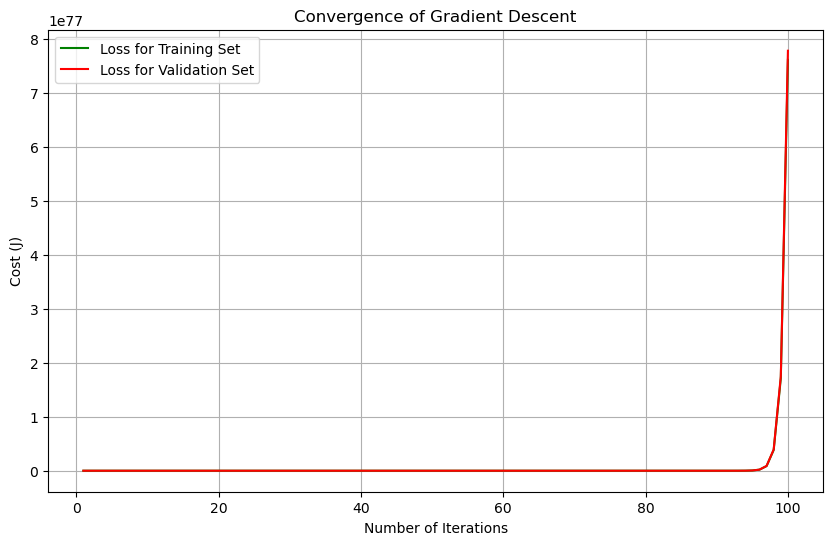

In [ ]:
plt.plot(range(1, iterations + 1),cost_history_00000001, color='green', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test_00000001, color='red', label= 'Loss for Validation Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

### For learning rate 0.00000001

In [ ]:
# We need theta parameter for every input variable. since we have 11 input variables

theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 100;
alpha = 0.00000001

In [ ]:
# Computing final theta values and cost/losses for training and validation set

theta, cost_history, cost_test = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('cost_history =', cost_history)
print('cost_test =', cost_test)

Final value of theta= [5.03540302e-01 8.61913008e+02 1.78781698e+00 9.85545333e-01
 1.48654318e+00 4.38735056e-01 1.67671139e-01 2.68441079e-01
 7.54020985e-02 3.55911493e-01 4.03761011e-01 1.85373127e-01]
cost_history = [7.17395237e+12 4.29408707e+12 2.92659610e+12 2.27724920e+12
 1.96890975e+12 1.82249615e+12 1.75297229e+12 1.71995918e+12
 1.70428303e+12 1.69683925e+12 1.69330459e+12 1.69162615e+12
 1.69082912e+12 1.69045063e+12 1.69027089e+12 1.69018551e+12
 1.69014495e+12 1.69012566e+12 1.69011648e+12 1.69011210e+12
 1.69011000e+12 1.69010897e+12 1.69010846e+12 1.69010820e+12
 1.69010805e+12 1.69010795e+12 1.69010789e+12 1.69010783e+12
 1.69010778e+12 1.69010773e+12 1.69010769e+12 1.69010764e+12
 1.69010760e+12 1.69010755e+12 1.69010751e+12 1.69010746e+12
 1.69010742e+12 1.69010737e+12 1.69010733e+12 1.69010728e+12
 1.69010724e+12 1.69010719e+12 1.69010715e+12 1.69010710e+12
 1.69010706e+12 1.69010701e+12 1.69010697e+12 1.69010692e+12
 1.69010688e+12 1.69010683e+12 1.69010679e+12 1

Text(0.5, 1.0, 'Convergence of Gradient Descent')

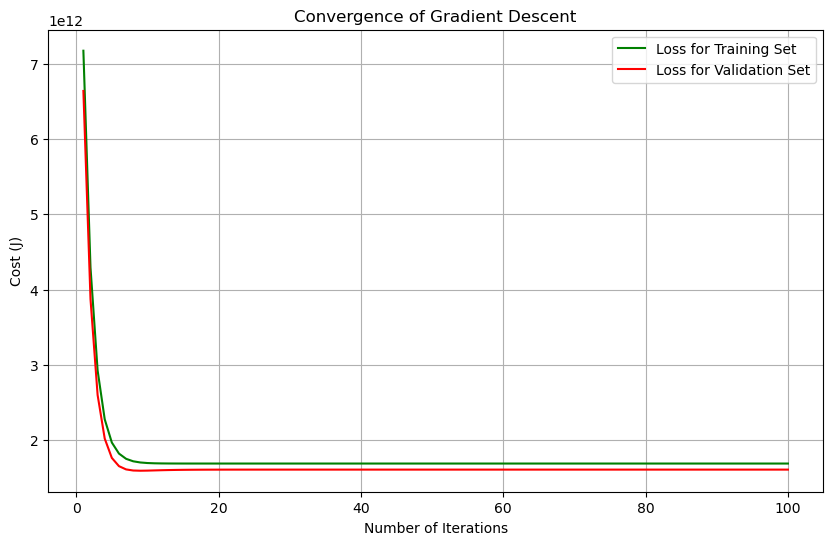

In [ ]:
plt.plot(range(1, iterations + 1),cost_history, color='green', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test, color='red', label= 'Loss for Validation Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

### Here we developed linear regression with gradient decent algorithm to estimate the price of the house based on the 11 input variables. 
 
### In problem 1a, we tried various learning rates between 0.1 and 0.01, but the model diverges after few iterations. We then reduced the learning rate to smaller values, and finally settled on 0.00000001, which resulted in the model converging, i.e., the cost decreased with each iteration.

### Comparing to problem 1a, we see the almost same plot for the training and validation losses over training iteration.